# Análisis exploratorio de datos

### Tipos de datos
- Numéricos: Datos que son expresados en una escala numérica.
     - Continuos
    - Discretos
- Categóricos: Datos que pueden tomar solo un conjunto específico de valores, que representa un cjto. de posibles categorías.
    - Binarios
    - Ordinales

### California Housing Prices 
de R. Kelley Pace & Ronald Barry, "Sparse Spatial Autoregressions" (1997), obtenidos del censo de California de 1990.

In [1]:
import pandas as pd
CA_housing = pd.read_csv("Datasets/housing.csv")

Veamos los primeros 5 renglones de datos utilizando el método head( ).

In [2]:
CA_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
CA_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Se cuenta con 20640 muestras, cada una correspondiente a una unidad mínima de medida del Buró de Censo de Estados Unidos. Cada unidad mínima tiene una población de 600 a 3000 personas.

De los 10 atributos estos son númericos menos uno, que es de tipo object.

In [4]:
CA_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

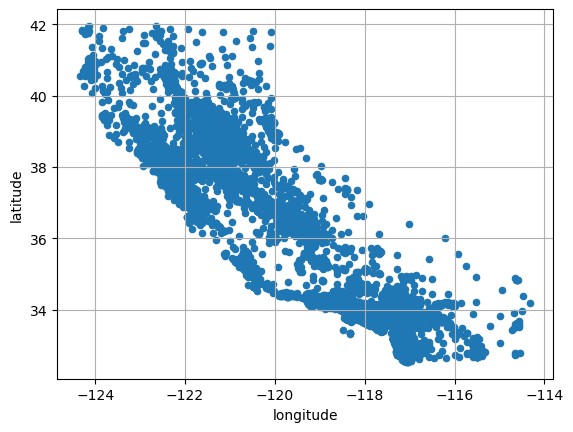

In [5]:
import matplotlib.pyplot as plt
CA_housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True)
plt.show()

# Descripciones numéricas
## Medidas de tendencia central/Estimadores de localización
Variables numéricas pueden tener miles de datos distintos. Un paso básico para explorar los datos es obtener un "dato típico" para cada variable: una estimación de dónde están más concentrados los datos.

### Media
El estimador de localización más básico es la media o valor promedio
$$
\bar{x}=\frac{\sum_{i=1}^nx_i}{n}.
$$
Una variante de esta es la **media truncada**, si denotamos a los valores ordenados de la muestra como $x_{(1)}, ..., x_{(n)}$ entonces la media truncada con $p$ valores más pequeños y más grandes truncados es 
$$
\bar{x}'=\frac{\sum_{i=p+1}^{n-p}x_{(i)}}{n-2p}
$$
Ejemplo:

In [6]:
import scipy.stats as scst
CA_housing["median_income"].mean()

np.float64(3.8706710029069766)

In [7]:
scst.trim_mean(CA_housing["median_income"], 0.1)

np.float64(3.654012203246124)

In [8]:
CA_housing["median_income"].max()

np.float64(15.0001)

In [9]:
CA_housing["median_income"].min()

np.float64(0.4999)

### Mediana
Este es el número "de en medio" en una lista de datos ordenada. Si hay un nro. par de datos, este valor no está en el cjto. original, sino más bien es el promedio de los dos centrales. Aún cuando el promedio es más sensible a los datos, muchas veces es útil.

Ejemplo:

In [10]:
CA_housing["median_income"].median()

np.float64(3.5347999999999997)

La mediana es un estimador _robusto_.

### Media ponderada
Otro tipo de media es la _media ponderada_, calculada a través de multiplicar cada dato $x_i$ por un peso especificado $w_i$ y luego dividir su suma por la suma de los pesos.
$$
\bar{x}_w=\frac{\sum_{i=1}^nw_ix_i}{\sum_{i=1}^nw_i}.
$$

Para ejemplificar el uso de la media ponderada utilizaremos los siguientes datos de población y tasas de homicidio (por cada 100 000 habitantes, al año) para cada estado de la unión americana, del censo de 2010.

In [11]:
state = pd.read_csv("Datasets/state.csv")

In [12]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


¿Por qué usaríamos una media ponderada para calcular la tasa de homicidio promedio para el país entero?

In [13]:
state["Murder.Rate"].mean()

np.float64(4.066)

In [14]:
import numpy as np
np.average(state["Murder.Rate"], weights = state["Population"])

np.float64(4.445833981123393)

In [15]:
state[["State", "Population"]]

,State,Population
0,Alabama,4779736
1,Alaska,710231
2,Arizona,6392017
3,Arkansas,2915918
4,California,37253956
5,Colorado,5029196
6,Connecticut,3574097
7,Delaware,897934
8,Florida,18801310
9,Georgia,9687653


### Valores atípicos
Un _outlier_ es cualquier valor que es muy distante de otros valores en el cjto. de datos. Tener un outlier no necesariamente hace inválido o erróneo a un dato. Aún así, muchas veces los outliers son resultado de errores de datos, como combinar datos de diferentes unidades. En cualquier caso deben ser identificados y usualmente meritorios de investigación.

## Estimadores de variabilidad
La localización es solo una dimensión en resumir una característica. Una segunda dimensión es la _variabilidad_ o _dispersión_.
Así como hay diferentes maneras de medir localización, hay diferentes formas de medir variabilidad. En casi todas estas medidas es necesario considerar un valor central de los datos como punto de referencia.

Para el siguiente cjto.
$$
\{-1, 0, 4, 4, 8\}
$$
tenemos que la media es $\bar{x}=3$ y sus desviaciones son
$$
\{-4, -3, 1, 1, 5\}\text{,}
$$
estas nos dicen qué tan dispersos están los datos alrededor del valor central.

### Desviación absoluta promedio
$$
\frac{\sum_{i=1}^n|x_i-\bar{x}|}{n}
$$
### Varianza y desviación estándar.
Estos son los estimadores de variabilidad más conocidos.
$$
s^2 = \frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}
$$
y
$$
s = \sqrt{s^2}=\sqrt{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}}\text{.}
$$
### MAD
_Median absolute deviation from the median_:
$$
\text{MAD}=\text{Mediana}(|x_1-m|, |x_2-m|, ..., |x_N-m|)
$$
con $m$ la mediana de los datos. Como la mediana, la MAD no está influenciada por valores extremos. 

Por otro lado, también es posible calcular una desviación estándar truncada en analogía a la media truncada.

### Estimados basados en percentiles
Un enfoque diferente está basado en observar el _spread_ de los datos ordenados. Estadísticos basados en datos ordenados se conocen como _estadísticos de orden_.
### Rango
Si tenemos los datos ordenados como $x_{(1)}, x_{(2)}, ..., x_{(N)}$ entonces el rango es
$$
x_{(N)}-x_{(1)}=x_{\text{max}}-x_{\text{min}}\text{.}
$$
### Cuantiles
Un cuantil es un valor que separa a los datos en dos partes: una cierta proporción de los datos son menores o iguales al cuantil y la proporción complementaria corresponde a datos que son mayores o iguales al cuantil.

Otra forma de verlos es habalar de percentiles. En un cjto. de datos el percentil $P-$ésimo es un valor tal que **al menos** un $P$% de los datos **toman este valor o menos** y al menos $(100-P)$% **toman este valor o más**.

Una medida común de variabilidad es la diferencia entre los percentiles 75 y 25, conocido como _rango intercuartil_ (IQR).

Ejemplo con median_income del data set California Housing Prices.

In [16]:
CA_housing['median_income'].std()

np.float64(1.8998217179452688)

Desviación estándar truncada.

In [17]:
scst.mstats.trimmed_std(CA_housing['median_income'], limits = (0.1,0.1), relative = True, ddof = 1)

np.float64(1.091578549431848)

In [18]:
scst.tstd(CA_housing['median_income'], limits = (CA_housing['median_income'].quantile(0.1), 
                                                 CA_housing['median_income'].quantile(0.9)))

np.float64(1.0916823616093132)

Previamente pandas permitía calcular con un método para el objeto _Series_ la mean absolute deviation, pero ya no más, así que definimos la siguiente función para calcularlo.

In [19]:
def mad_1(datos, axis = None):
    return np.mean(np.abs(datos - np.mean(datos, axis)), axis)

In [20]:
mad_1(CA_housing['median_income'])

np.float64(1.4016136452417973)

Para calcular el Median Absolute Deviation from the median, que también se abrevia como MAD, lo importamos del paquete statsmodels. Esta función multiplica a este número por una constante c, para que sirva como estimador consistente de la desviación estándar, si solo queremos el MAD entonces hacemos c = 1.

In [21]:
from statsmodels.robust.scale import mad
mad(CA_housing['median_income'], c=1)

np.float64(1.0641999999999996)

Calculemos ahora el rango de estos datos

In [22]:
CA_housing['median_income'].max()-CA_housing['median_income'].min()

np.float64(14.5002)

Y su rango intercuartil

In [23]:
CA_housing['median_income'].quantile(0.75)-CA_housing['median_income'].quantile(0.25)

np.float64(2.17985)

Población de los estados de la unión americana:

In [24]:
stdev = state['Population'].std()
mad1 = mad_1(state['Population'])
mad2 = mad(state['Population'], c=1)

In [25]:
print(f"Desv. estandar: {stdev}, desv. abs. prom.: {mad1}, MAD: {mad2}")

Desv. estandar: 6848235.347401142, desv. abs. prom.: 4450933.356000001, MAD: 2596702.0


Rango

In [26]:
state['Population'].max()-state['Population'].min()

np.int64(36690330)

Rango intercuartil

In [27]:
state['Population'].quantile(0.75)-state['Population'].quantile(0.25)

np.float64(4847308.0)

## Explorar la distribución de los datos
Hasta ahora solo hemos utilizado resúmenes numéricos para describir la localización y la variabilidad de los datos. Veamos ahora más gráficamente su distribución.
### Boxplots
Los percentiles son también valiosos para resumir la distribución completa. Es usual reportar los cuartiles (cuantiles 0.25, 0.5 y 0.75). Y los percentiles son especialmente útiles para resumir las _colas_ de la distribución.

Los _Boxplots_ introducidos por John Tukey en 1977 están basados en percentiles y son una manera rápida de visualizar la distribución de los datos. Veamos un ejemplo con los datos de población de Estados Unidos.

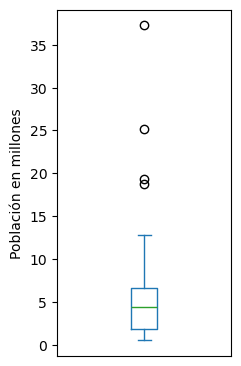

In [28]:
ax = (state['Population']/1000000).plot.box(figsize = (2.25,4.5))
ax.set_ylabel("Población en millones")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

En esta gráfica la mediana se indica por la línea horizontal en la caja, la tapa representa el cuantil 0.75 y el fondo el 0.25. A las líneas verticales se les conoce como brazos y se extienden, desde los bordes, hasta 1.5 veces el rango intercuartil (IQR). Cualquier dato fuera de los brazos se grafica como un punto y usualmente se consideran como valores atípicos.

Veamos otro ejemplo, ahora con los datos de ingresos del dataset de California Housing Prices.

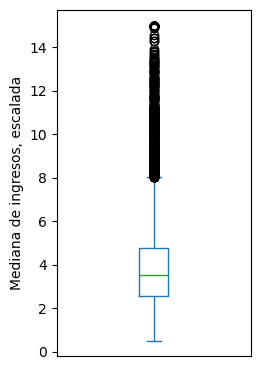

In [29]:
ax = CA_housing['median_income'].plot.box(figsize = (2.5, 4.5))
ax.set_ylabel("Mediana de ingresos, escalada")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

Existen otras formas de construir boxplots por lo que es importante checar cuál se está utilizando. Una de esas formas es colocar el centro de la caja en la media, $\bar{x}$, con los bordes de la caja una desviación estándar hacia arriba y una hacia abajo. Con la extensión de los brazos abarcando los valores mínimos y máximos.

### Tablas de frecuencias e histogramas
Una tabla de frecuencias de una variable divide el rango de la variable en segmentos igualmente espaciados y nos dice cuántos valores caen en cada segmento. 

Veamos la tabla de frecuencias para la población de los Estados Unidos.

In [30]:
pob_cat = pd.cut(state['Population'], 10)
pob_cat

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [31]:
pob_cat.cat.categories

IntervalIndex([  (526935.67, 4232659.0],   (4232659.0, 7901692.0],
                (7901692.0, 11570725.0], (11570725.0, 15239758.0],
               (15239758.0, 18908791.0], (18908791.0, 22577824.0],
               (22577824.0, 26246857.0], (26246857.0, 29915890.0],
               (29915890.0, 33584923.0], (33584923.0, 37253956.0]],
              dtype='interval[float64, right]')

In [32]:
pob_cat.value_counts()[pob_cat.cat.categories]

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
(33584923.0, 37253956.0]     1
Name: count, dtype: int64

In [33]:
state['Abbreviation'][pob_cat == pob_cat.cat.categories[0]]

1     AK
3     AR
6     CT
7     DE
10    HI
11    ID
14    IA
15    KS
18    ME
23    MS
25    MT
26    NE
27    NV
28    NH
30    NM
33    ND
35    OK
36    OR
38    RI
40    SD
43    UT
44    VT
47    WV
49    WY
Name: Abbreviation, dtype: object

In [34]:
state['Abbreviation'][pob_cat == pob_cat.cat.categories[6]]

42    TX
Name: Abbreviation, dtype: object

Un histograma es una forma de visualizar una tabla de frecuencias, con _bins_ en el eje x y los conteos en el eje y.

Text(0.5, 0, 'Población en millones')

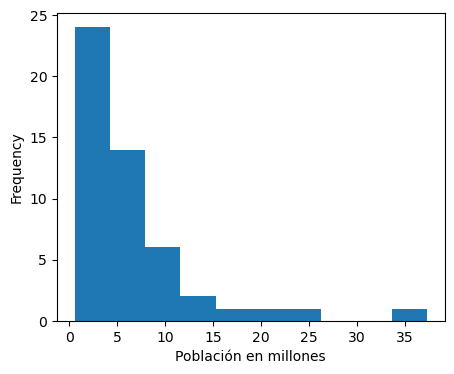

In [35]:
ax = (state['Population']/1000000).plot.hist(figsize = (5,4), bins = 10)
ax.set_xlabel('Población en millones')

Relacionado al histograma tenemos un plot de densidad, que muestra la distribución de los valores como una línea continua. Se relaciona con las densidades de probabilidad continuas que se ven en el estudio de variables aleatorias. Puede considerarse como un histograma _suavizado_ aunque típicamente es calculado directamente de los datos a través de un _kernel density estimate_.

Text(0.5, 0, 'Población en millones')

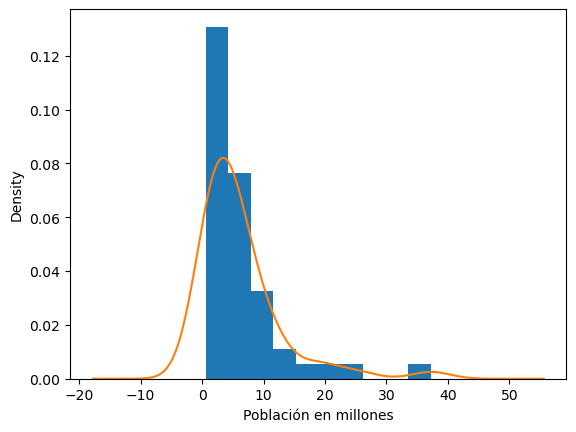

In [36]:
ax = (state['Population']/1000000).plot.hist(density = True, bins = 10)
(state['Population']/1000000).plot.density(ax = ax)
ax.set_xlabel('Población en millones')

## Datos binarios y categóricos
Obtener un resumen de una variable binaria o categórica, cuando se tienen pocas categorías, es bastante sencillo. Basta con ver las proporciones de 1's o de las categorías relevantes.

In [37]:
CA_housing["ocean_proximity"].value_counts()/sum(CA_housing["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: count, dtype: float64

### Gráficos de barras
Así como los histogramas nos sirvieron para visualizar las tablas de frecuencias, los gráficos de barras nos permiten visualizar las proporciones de una variable categórica. Las categorías están listadas en el eje x y las frecuencias (o proporciones) en el eje y.

Text(0, 0.5, 'Conteo')

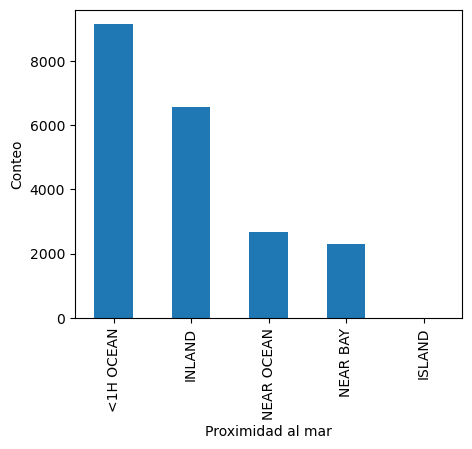

In [38]:
ax = CA_housing["ocean_proximity"].value_counts().plot.bar(figsize = (5, 4), legend = False)
ax.set_xlabel("Proximidad al mar")
ax.set_ylabel("Conteo")

No sólo son útiles para visualizar conteos

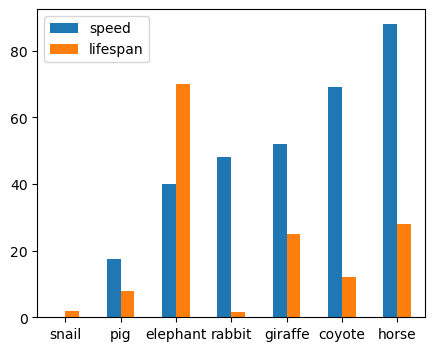

In [39]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(figsize = (5, 4) , rot=0)

Text(0, 0.5, 'Nro. de distritos')

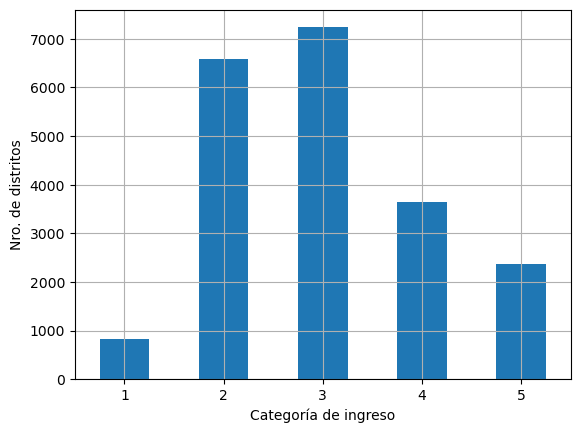

In [40]:
income_cat = pd.cut(CA_housing["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                   labels = [1, 2, 3, 4, 5])
ax = income_cat.value_counts().sort_index().plot.bar(rot=0, grid = True)
ax.set_xlabel('Categoría de ingreso')
ax.set_ylabel('Nro. de distritos')


Ciertamente al encajonar datos numéricos en bins para crear tablas de frecuencia o histogramas, estamos implícitamente convirtiendo los datos numéricos en un _factor_ (var. cat.) ordenada. En este sentido, los histogramas y los gráficos de barras son parecidos, excepto que las categorías en el eje x no se encuentran ordenadas, además, son importantes los espacios sin conteo en los histogramas, indicando valores que no ocurrieron en los datos.

### Moda
Me indica la categoría que más aparece en los datos. Generalmente no se utiliza en datos numéricos.

### Valor esperado
Un tipo de promedio ponderado, con las frecuencias como pesos. Utilizado cuando las categorías pueden representar valores discretos en una escala común. 

Ejemplo:

Un publicista para un curso en línea de trading de derivados financieros ofrece dos niveles de servicio, uno a $\textdollar$398.90 por mes, y otro a $\textdollar$150 por mes. Este ofrece webinars gratis para generar leads, y la consultoría estima que un 7.5% de l@s asistentes contratará el servicio de $\textdollar$398.90, un 17.7% contratará el servicio menor y un 74.8% no contratará nada. Para fines financieros se puede resumir esta información como sigue

$$
\text{Valor esperado de un/a asistente:}=0.075*398.9+0.177*150+0*0.748=56.46.
$$
Que, si conocemos el nro. $N$ de asistentes no es más que multiplicar cada categoría de servicio por la proporción de asistentes: $N*p$, sumar todo y dividir entre el total.

En una variable categórica las categorías pueden representar distintas cosas (perritos y gatitos, hombre y mujer), niveles de una variable ordenada (bajo, medio y alto), también conocidas como _factores_, o datos numéricos que han sido compartimentalizados.

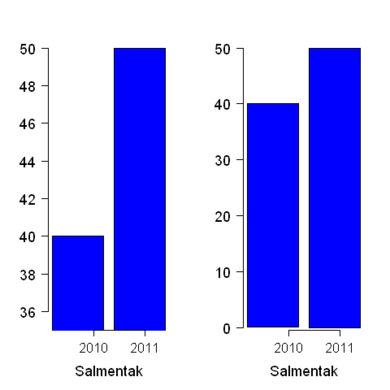

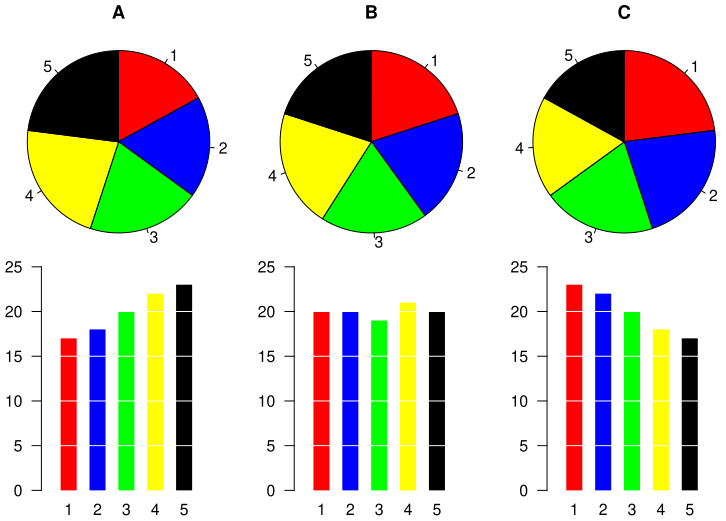

## Correlación
En muchos proyectos de modelación es importante que en la fase exploratoria se examine la correlación entre predictores/covariables, así como entre predictores y una variable objetivo/respuesta. Intuitivamente dos variables numéricas A y B se dice que están **positivamente correlacionadas** si valores grandes de A están acompañados de valores grandes de B, así como valores bajos de A van con valores bajos de B. _mutatis mutandis_ se tiene la definición de **negativamente correlacionadas**. 

### ¿Cómo medir la correlación?
Considerando a dos variables numéricas como provenientes de  una variable aleatoria bidimensional $(X, Y)$, utilizamos la métrica normalizada conocida como coeficiente de correlación. En este caso el _coeficiente de correlación muestral_, dado por
$$
r = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2\sum_{i=1}^n(y_i-\bar{y})^2}}.
$$
Este siempre se encuentra entre -1 y +1. 

Podría tenerse una asociación que no es lineal. Por ejemplo, la relación entre tasa de impuestos e ingresos recaudados. Al incrementarse desde 0 el gravamen, la recaudación también se incrementa, pero, al seguir incrementando y sobrepasar cierto umbral, se incrementa la evación fiscal y la recaudación en realidad disminuye.

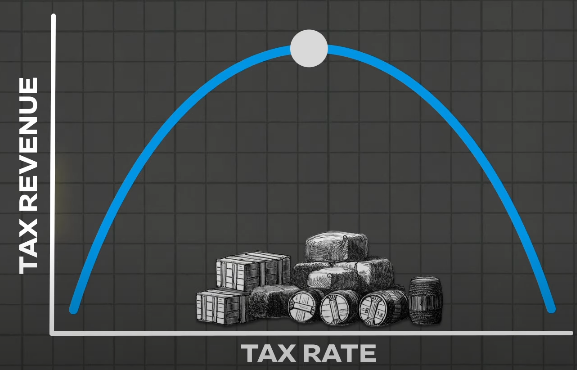

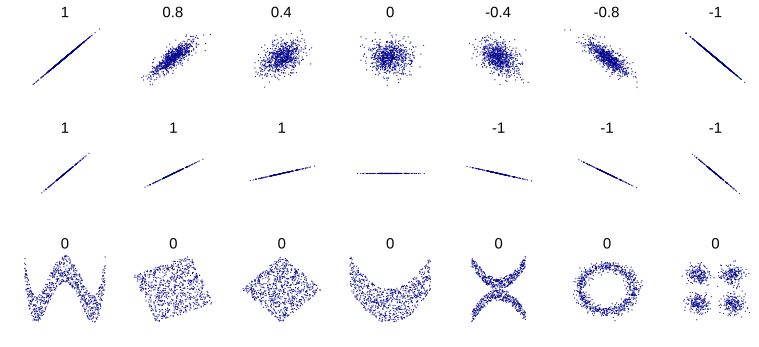

Pandas provee una forma fácil de calcular la matriz de correlaciones.

In [41]:
corr_m = CA_housing.iloc[:,:-1].corr()
corr_m

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Con el siguiente código de seaborn graficamos un heatmap para ver más fácilmente las correlaciones existentes.

<Axes: >

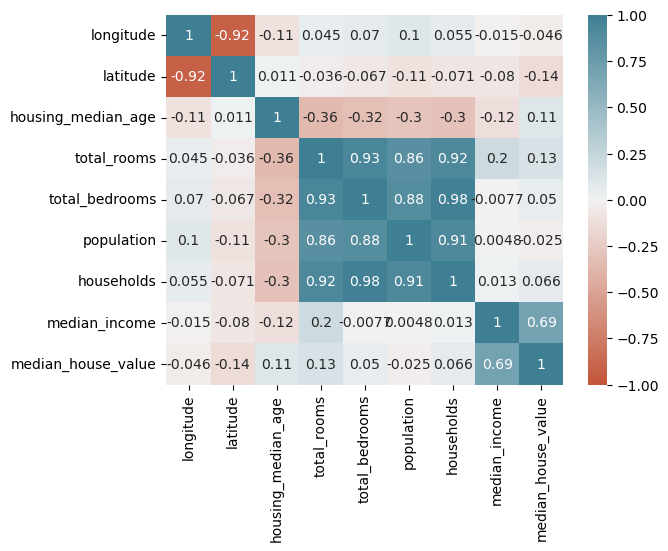

In [42]:
import seaborn as sns
sns.heatmap(corr_m, vmin = -1, vmax = 1, cmap = sns.diverging_palette(20, 220, as_cmap = True),
           annot = True)

Veamos las correlaciones de las covariables con la variable objetivo.

In [43]:
corr_m['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Gráficos de dispersión
Esta es la manera estándar de visualizar la relación entre dos variables medidas. Es comúnmente utilizada para visualizar regresiones de una o dos variables. El eje x representa una variable y el eje y otra, cada punto es un registro. 

En pandas se puede obtener fácilmente la matriz de dispersión de cada una de las variables respecto a la otra.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

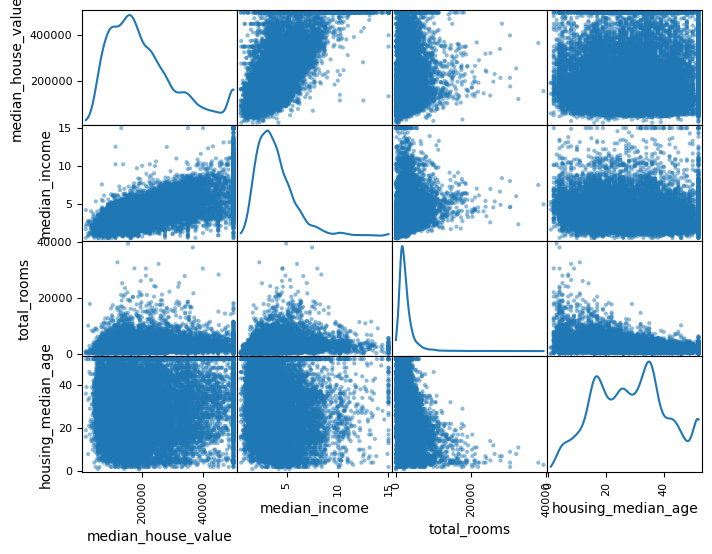

In [44]:
atributos = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(CA_housing[atributos], figsize = (8, 6), diagonal = 'kde')

Veamos más de cerca la relación entre median_house_value y median_income

Text(0.5, 0, 'mediana de ingresos')

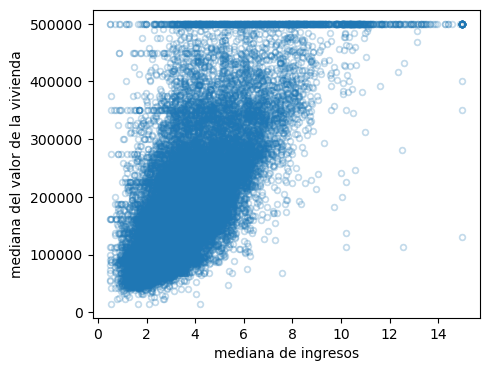

In [45]:
ax = CA_housing.plot.scatter(x = 'median_income', y = 'median_house_value', figsize = (5, 4), marker = '$\u25EF$', alpha = 0.2)
ax.set_ylabel('mediana del valor de la vivienda')
ax.set_xlabel('mediana de ingresos')

## Otras formas de visualizar datos numéricos vs datos numéricos
Al incrementarse el nro. de datos, los gráficos de dispersión se vuelven incómodos para identificar características relevantes del conjunto de datos.

Consideremos el dataset KingsCounty_tax para ejemplificar esto.

In [46]:
KC = pd.read_csv("Datasets/KingsCounty_tax.csv")
KC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498249 entries, 0 to 498248
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TaxAssessedValue  497511 non-null  float64
 1   SqFtTotLiving     498249 non-null  int64  
 2   ZipCode           467900 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 11.4 MB


In [47]:
KC.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


Descartamos los valores no válidos.

In [48]:
KC.dropna(axis = 0, inplace = True)
KC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467363 entries, 1 to 498248
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TaxAssessedValue  467363 non-null  float64
 1   SqFtTotLiving     467363 non-null  int64  
 2   ZipCode           467363 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 14.3 MB


Y filtramos para propiedades con valor no tan grande y tamaño no tan grande ni tan pequeño.

In [49]:
KC_0 = KC.loc[(KC.TaxAssessedValue < 750000) & (KC.SqFtTotLiving > 100) & (KC.SqFtTotLiving < 3500), :]
KC_0.shape

(409456, 3)

### Hexagonal binning plot
En la siguiente figura se tiene una gráfica de agrupamiento por hexágonos para las variables valuación con base en impuestos vs pies cuadrados de la propiedad. Cf. con la correspondiente gráfica de dispersión.

Text(0, 0.5, 'Valuación con base en impuestos')

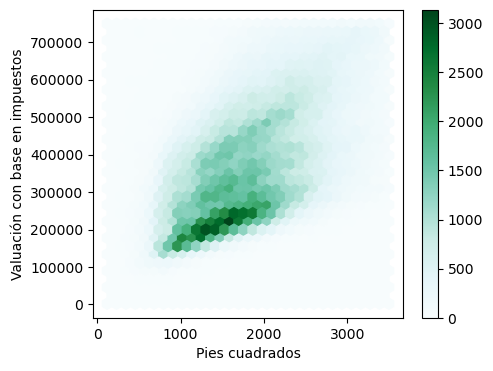

In [50]:
ax = KC_0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue', gridsize = 30, figsize = (5, 4), cmap = 'BuGn')
ax.set_xlabel('Pies cuadrados')
ax.set_ylabel('Valuación con base en impuestos')

Text(0, 0.5, 'Valuación con base en impuestos')

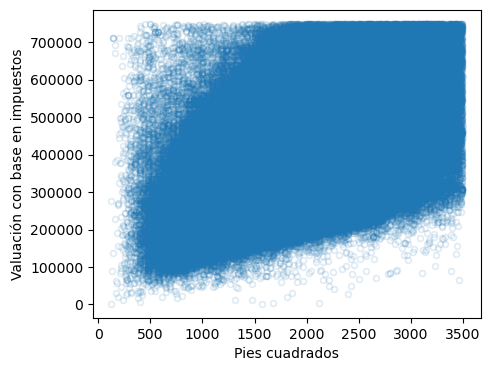

In [51]:
ax = KC_0.plot.scatter(x = 'SqFtTotLiving', y = 'TaxAssessedValue', marker = '$\u25ef$', alpha = 0.1, figsize = (5, 4))
ax.set_xlabel('Pies cuadrados')
ax.set_ylabel('Valuación con base en impuestos')

### _Gráfica de contorno_
Estimación bidimensional de densidad. Graficada por medio de curvas de nivel.

Text(0, 0.5, 'Valuación con base en impuestos')

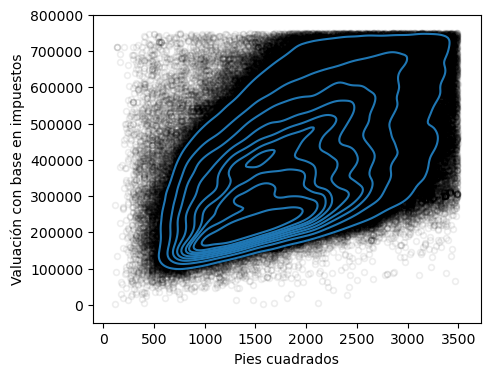

In [52]:
ax = KC_0.plot.scatter(x = 'SqFtTotLiving', y = 'TaxAssessedValue', marker = '$\u25ef$', alpha = 0.05, c = 'k', figsize = (5, 4))
sns.kdeplot(x = KC_0.SqFtTotLiving, y = KC_0.TaxAssessedValue, ax = ax)
ax.set_xlabel('Pies cuadrados')
ax.set_ylabel('Valuación con base en impuestos')

## Explorar dos variables categóricas
Una manera útil de resumir dos variables categóricas es con una tabla de contingencia (contingency table). Este tipo de tablas es de clasificación múltiple. Por ejemplo, en un cuestionario de opinión pública los individuos entrevistados podrían ser clasificados de acuerdo a su posición en una propuesta política y de acuerdo al sexo, para obtener una tabla como la siguiente:

![Figura 1](img/fig1.png)

Una tabla de contingencia da una forma conveniente de mostrar los datos, con el fin de investigar relaciones esperadas.
![Figura 2](img/fig2.png)

Veamos un ejemplo con datos de préstamos, haciendo énfasis en las variables "grade" y "status", las cuales representan la calificación dada a un préstamo y el estado del mismo.

In [56]:
lc_loans = pd.read_csv("Datasets/loan_data.csv")
lc_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Originalmente la variable "grado" es numérica continua, para hacerla categórica ordinal (con etiquetas de la A a la G), usamos la función siguiente, en donde especificamos el número de divisiones que queremos hacer en los datos y la etiqueta de cada división. La nueva variable categórica se la agregamos al dataframe original bajo el nombre "grado".

In [ ]:
lc_loans['grado']=pd.cut(lc_loans['grade'], 7, labels = ['G', 'F', 'E', 'D', 'C', 'B', 'A'])

Para crear una tabla de contingencia de estas dos variables categóricas utiizamos el método pivot_table, aplicado al subconjunto de variables de interés. La funcción aggfunc nos permite obtener el conteo de los datos cruzados, el argumento margin agrega la suma de columnas y renglones.

In [ ]:
tabla_cruzada = lc_loans[['status','grado']].pivot_table(index = 'grado', columns = 'status', aggfunc = lambda x: len(x), margins = True)
tabla_cruzada

Para obtener la misma tabla, pero ahora de proporciones, se divide entre el total por renglón. Los totales por renglón están almacenados en la columna "All" y lo dividimos elemento a elemento a través del método div.

In [ ]:
df = tabla_cruzada.loc['G':'A', :].copy()
df.loc[:, 'Charged Off': 'Fully Paid'] = df.loc[:, 'Charged Off': 'Fully Paid'].div(df['All'], axis = 0)
df['All'] = df['All']/sum(df['All'])
df

## Datos categóricos y numéricos
Los boxplots son una forma simple de comparar visualmente las distirbuciones de una variable numérica agrupada de acuerdo a una variable categórica. Por ejemplo, en el siguiente conjunto de datos de motivo de retraso de vuelo, comparamos el porcentaje de retrasos entre aerolíneas.

Text(0, 0.5, 'Porcentaje diario de vuelos retrasados')

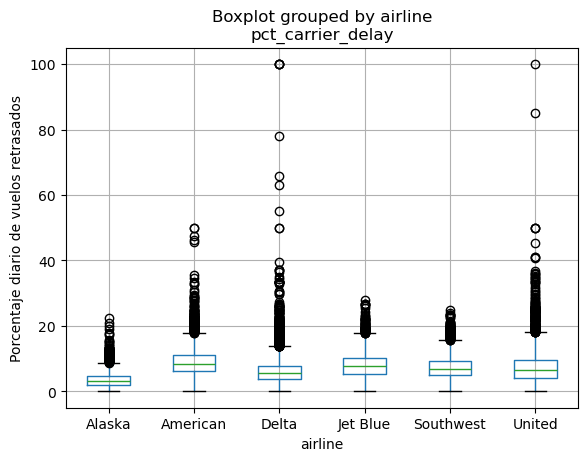

In [58]:
retraso_vuelo = pd.read_csv("Datasets/stats_aerolinea.csv")
# El argumento by divide los datos en grupos y crea los boxplots individuales
ax = retraso_vuelo.boxplot(by = 'airline', column = 'pct_carrier_delay')
ax.set_ylabel('Porcentaje diario de vuelos retrasados')

In [59]:
retraso_vuelo.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


### _Gráficos de violín_
Introducidos por Hintze-Nelson en 1998, son una mejora en ciertos aspectos del boxplot, grafica la estimación de densidad con la densidad en el eje y. La ventaja es que puede mostrar detalles de la distirbución que no son perceptibles en el boxplot. Estos están disponibles en el método violinplot de la paquetería seaborn.

[(-2.0, 52.0)]

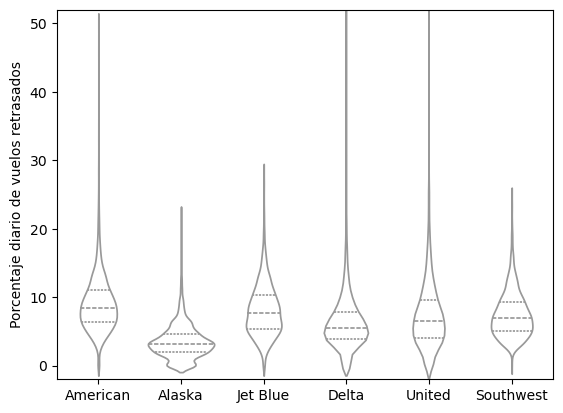

In [60]:
ax = sns.violinplot(x = retraso_vuelo.airline, y = retraso_vuelo.pct_carrier_delay, inner = 'quartile', color = 'white')
ax.set_xlabel('')
ax.set_ylabel('Porcentaje diario de vuelos retrasados')
ax.set(ylim = (-2,52))

## Visualizar múltiples variables
Los tipos de gráficos utilizados para comparar dos variables se pueden extender a más variables a través de _condicionar_. Por ejemplo, regresando a los datos de valuación con base en impuestos vs área en pies cuadrados, graficamos estos datos para diferentes valores del código zip, efectivamente tomando en cuenta de la ubicación de las propiedades.

In [61]:
codigos_zip = [98188, 98105, 98108, 98126]
KC_zip = KC_0.loc[KC_0.ZipCode.isin(codigos_zip),:]

In [62]:
KC_zip.ZipCode.value_counts()

ZipCode
98126.0    5631
98108.0    5535
98105.0    4481
98188.0    4043
Name: count, dtype: int64

In [63]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 25, cmap = cmap, **kwargs)

FacetGrid en seaborn se utiliza para graficar relaciones condicionales.

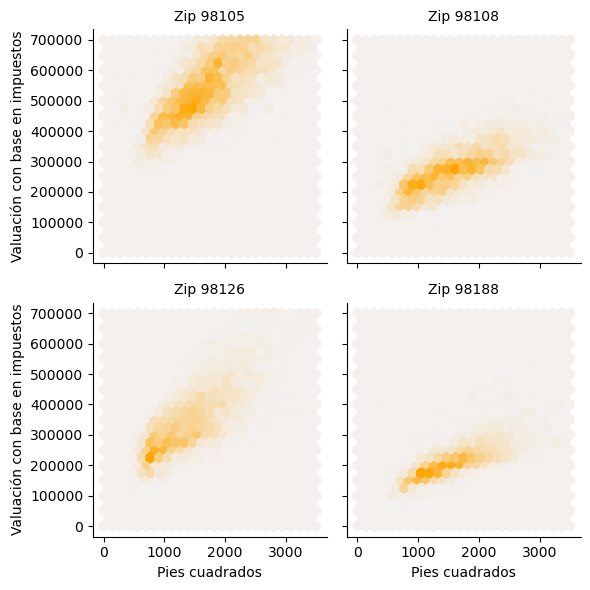

In [64]:
# Esta clase mapea un conjunto de datos a múltiples ejes dispuestos en una cuadrícula,
# en el argumento col especificamos con base a qué condicionaremos las demás variables
g = sns.FacetGrid(KC_zip, col = 'ZipCode', col_wrap = 2)
# Este método aplica una función de graficación a cada subconjunto de los datos
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent = [0, 3500, 0, 700000], color = 'orange')
g.set_axis_labels('Pies cuadrados', 'Valuación con base en impuestos')
g.set_titles('Zip {col_name:.0f}')